<a href="https://colab.research.google.com/github/nattrio/INT491-Capstone-Project/blob/main/61130500013_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INT491: Capstone Project
---
สมาชิก:
* นายจิรพัทธ์ เกลาเกลี้ยง 61130500013





## Business Understanding

### Overview

Bank Customers Churn
Source: https://www.kaggle.com/santoshd3/bank-customers

ใช้ข้อมูลที่ธนาคารทำการเก็บรวบรวมจากลูกค้า เพื่อนำมาวิเคราะห์หาว่ามีแนวโน้มที่จะยกเลิกใช้บริการจากธนาคารนี้หรือไม่

โจทย์ลักษณะนี้จัดเป็นประเภท Classification ซึ่งปัจจัยในการทำนายว่าลูกค้าจะตัดสินใจยกเลิกการใช้บริการหรือไม่นั้นมีหลายประการ

เราสามารถเอาข้อมูลนั้นมาฝึกและใช้ทำนายลูกค้าที่มีแนวโน้มจะยกเลิกบริการ ให้เรารู้ล่วงหน้าและสามารถติดต่อเสนอโปรโมชั่นเพื่อให้ลูกค้ายังคงอยู่ต่อได้

### Row

มีจำนวน 10000 แถว


### Column

มีจำนวน 14 คอลัมน์ ได้แก่

*   RowNumber (เลขแถว)
*   CustomerId (หมายเลขลูกค้า)
*   Surname (นามสกุล)
*   CreditScore (เครดิตสกอร์)
*   Geography (ภูมิภาค)
*   Gender (เพศ)
*   Age (อายุ)
*   Tenure (การครอบครอง)
*   Balance (ยอดเงิน)
*   NumOfProducts (จำนวนสินค้า)
*   HasCrCard (มีบัตรเครดิตหรือไม่)
*   IsActiveMember (เป็นสมาชิกที่เคลื่อนไหวหรือไม่)
*   EstimatedSalary (ประมาณการรายได้)
*   Exited (การยกเลิกใช้บริการ)

## Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nattrio/INT491-Capstone-Project/main/Churn%20Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
# sns.pairplot(df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
#        'IsActiveMember', 'EstimatedSalary', 'Exited']],hue = 'Exited')

## Data Preparation

### Drop Nonuse Column
เนื่องจากคอลัมน์ดังต่อไปนี้ ไม่ได้มีประโยชน์ในการใช้วิเคราะห์หรือสร้างโมเดลทำนาย จึงทำการตัดทิ้ง ได้แก่
1.   RowNumber
2.   CustomerId
3.   Surname

In [5]:
df.drop(columns=['CustomerId','Surname','RowNumber'],inplace = True)

In [6]:
# Null Checking
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dummy variable
สร้างตัวแปร Dummy หรือ Categorical variable คือแปลงข้อมูลเชิงคุณภาพให้สามารถนำไปใช้แทนข้อมูลเชิงปริมาณ ได้แก่

*   Geography
*   Gender



In [7]:
df1 = pd.get_dummies(data = df,columns=['Geography','Gender'])
df1.sample(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7033,651,45,4,0.00,2,0,0,193009.21,0,0,0,1,0,1
639,785,36,4,135438.40,1,0,0,190627.01,0,1,0,0,1,0
6096,642,41,4,157777.58,1,1,0,67484.60,0,0,1,0,0,1
1902,773,33,10,0.00,1,1,1,98820.09,0,0,0,1,1,0


### Standardization
ลองนำข้อมูลจากคอลัมน์ที่เป็นตัวเลขมาพิจารณาดูว่า ข้อมูลต่างหน่วยมีช่วงที่ห่างกันเกินไปหรือไม่

In [8]:
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# PCA ลองแล้วไม่ค่อยได้ผลดีขึ้นเท่าไหร่
from sklearn.pipeline import make_pipeline,Pipeline

<AxesSubplot:>

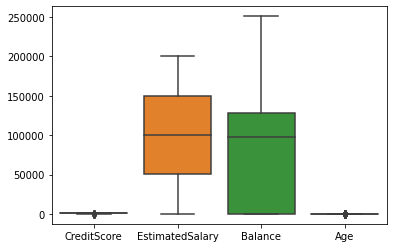

In [9]:
cols_to_scale = ['CreditScore','EstimatedSalary','Balance','Age']
sns.boxplot(data=df1[cols_to_scale])

พอพิจารณาดูแล้ว ช่วงนั้นเปรียบเทียบได้ลำบาก อาจเกิดผลต่อความแม่นยำในการทำนาย จึงลองทำการ Standardization

In [10]:
scaler = StandardScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

<AxesSubplot:>

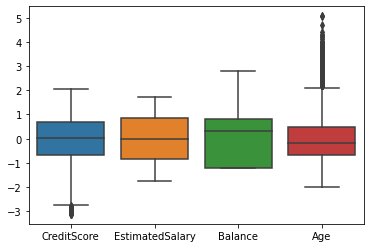

In [11]:
sns.boxplot(data=df1[cols_to_scale])

ซึ่งได้ทดลองกับ Logistic Regression Model แล้วประสิทธิภาพดีขึ้น จาก 0.78 เป็น 0.80

### Train Test Split with Imbalance Data
พบว่า Target ของข้อมูลนั้น Imbalance เพราะมีสัดส่วนของคนที่ออกกับไม่ออกไม่เท่ากัน อาจทำให้มีผลกับการฝึกโมเดลได้ จึงทำการ stratify ตัว target y ให้ยึดและแบ่งสัดส่วนให้เท่ากันทั้งตอน train, test

In [12]:
X = df1.drop(columns=['Exited'],axis = 'columns')
y = df1['Exited']

In [13]:
df.groupby("Exited")['Balance'].count()

Exited
0    7963
1    2037
Name: Balance, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [15]:
y_train[y_train==1].shape, y_train[y_train==0].shape

((1630,), (6370,))

In [16]:
y_test[y_test==1].shape, y_test[y_test==0].shape

((407,), (1593,))

## Modeling

In [17]:
# Basic
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

In [18]:
# for ROC Curve with k-Fold CV
import matplotlib.pylab as plt
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
import matplotlib.patches as patches
import numpy as np

In [19]:
clf = RandomForestClassifier(random_state=0)
cv = KFold(n_splits=5,shuffle=False)

In [20]:
X = np.array(X)
y = np.array(y)

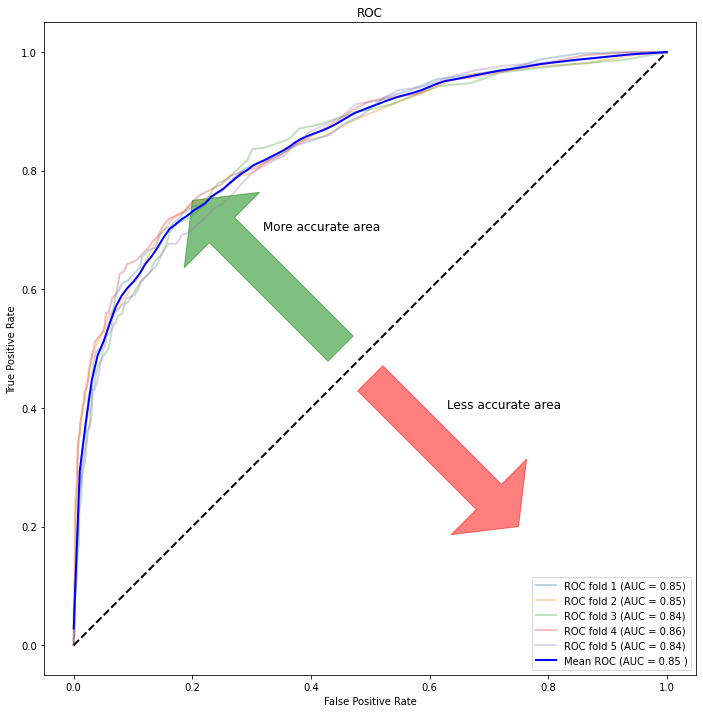

In [21]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X[train],y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [22]:
from utils.preprocess import *
from utils.modeling import *
from utils.experiment import *

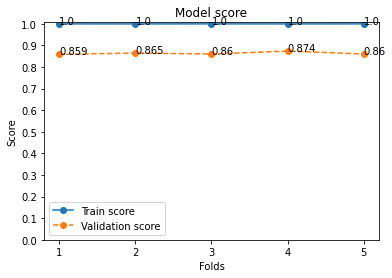

Train score
Mean:	 0.9999499999999999
[1.0, 0.999875, 1.0, 0.999875, 1.0]


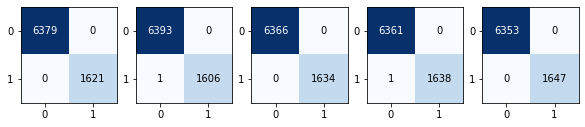

Validation
Mean:	 0.8638000000000001
[0.859, 0.865, 0.8605, 0.874, 0.8605]


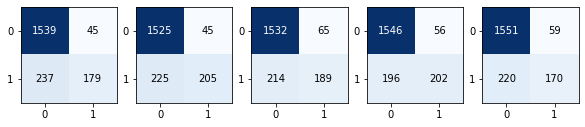

Under estimate
Mean:	 0.9730000000000001
[0.9775, 0.9775, 0.9675, 0.972, 0.9705]
Predict 1 (8785)
 - Accuracy:	7693	(88%)
 - Acceptable:	8785	(100%)
 - Missed:	0	(0%)
Predict 2 (1215)
 - Accuracy:	945	(78%)
 - Acceptable:	1215	(100%)
 - Missed:	0	(0%)


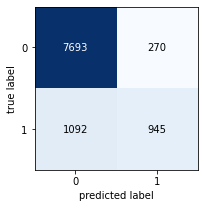

In [23]:
clf = RandomForestClassifier(random_state=0)
kfold_eval(5,clf,X,y)